In [347]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib as mpt
from sklearn.preprocessing import MinMaxScaler


DATAYI OKU

In [348]:
import pandas as pd

# Excel dosyasından veriyi oku
data = pd.read_csv("dataExcel.csv")

df = pd.DataFrame(data)

# Veri çerçevesini göster
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


In [349]:
df['Result'] = df['Result'].replace({'Yes': 1, 'No': 0})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [350]:
# 'Column_Name' sütunundaki yanlış sıfır değerleri ortalama değerle doldurma
columns_to_impute = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column] = df[column].replace(0, mean_value)


In [351]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


NORMALİZE

In [354]:
    # MinMaxScaler oluştur
scaler = MinMaxScaler()

# 'Result' sütununu dışarıda tut ve geri kalan sütunları normalize et
scaled_features = scaler.fit_transform(df.drop(columns=['Result']))

# Normalize edilmiş özellikleri içeren DataFrame oluştur
normalized_df = pd.DataFrame(scaled_features, columns=df.drop(columns=['Result']).columns)

# 'Result' sütununu normalize edilmiş DataFrame'e ekleyin
normalized_df['Result'] = df['Result']

normalized_df = pd.DataFrame(normalized_df)

# Sonuçları göster
normalized_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,0.312500,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.000000,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.437500,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.000000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.177816,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.562500,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.062500,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0
765,0.250000,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.000000,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,1


In [401]:
import numpy as np

# İşlem yapılacak kolonları belirleme
selected_columns = ["BMI", "DiabetesPedigreeFunction", "SkinThickness"]

# Her bir seçilen kolon için aykırı değerleri belirleme ve ortalamayla değiştirme işlemini bir döngü içinde yapma
for col in selected_columns:
    Q1 = normalized_df[col].quantile(0.25)
    Q3 = normalized_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    normalized_df[col] = np.where((normalized_df[col] > upper_limit), normalized_df[col].mean(), normalized_df[col])


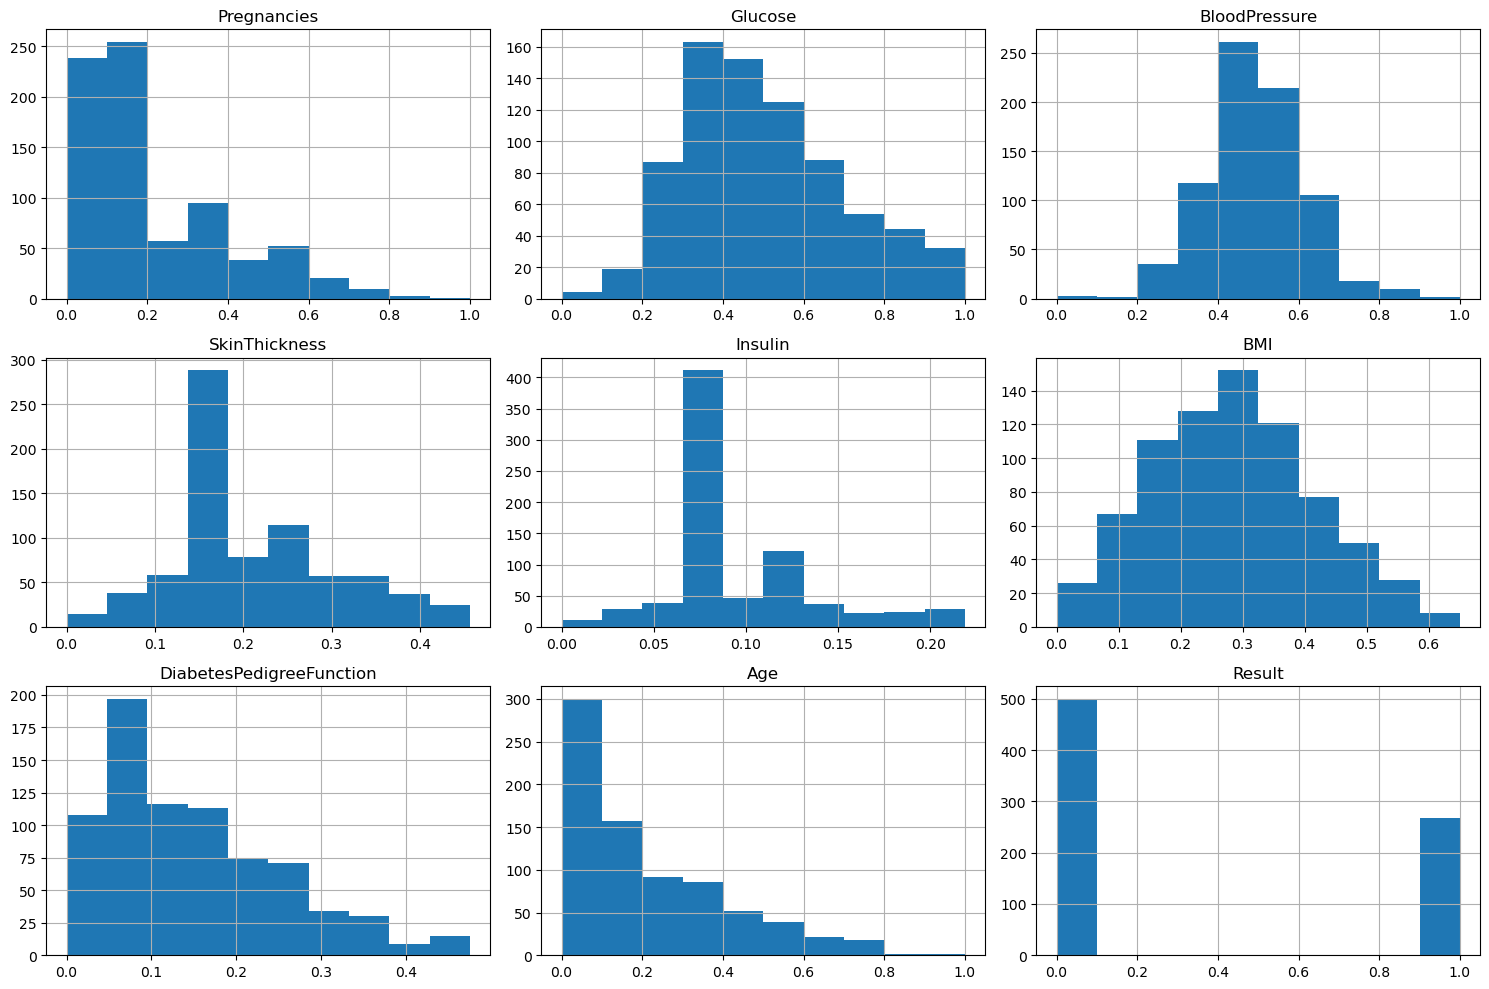

In [402]:
import matplotlib.pyplot as plt

# Tüm özelliklerin histogramlarını çizme
normalized_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


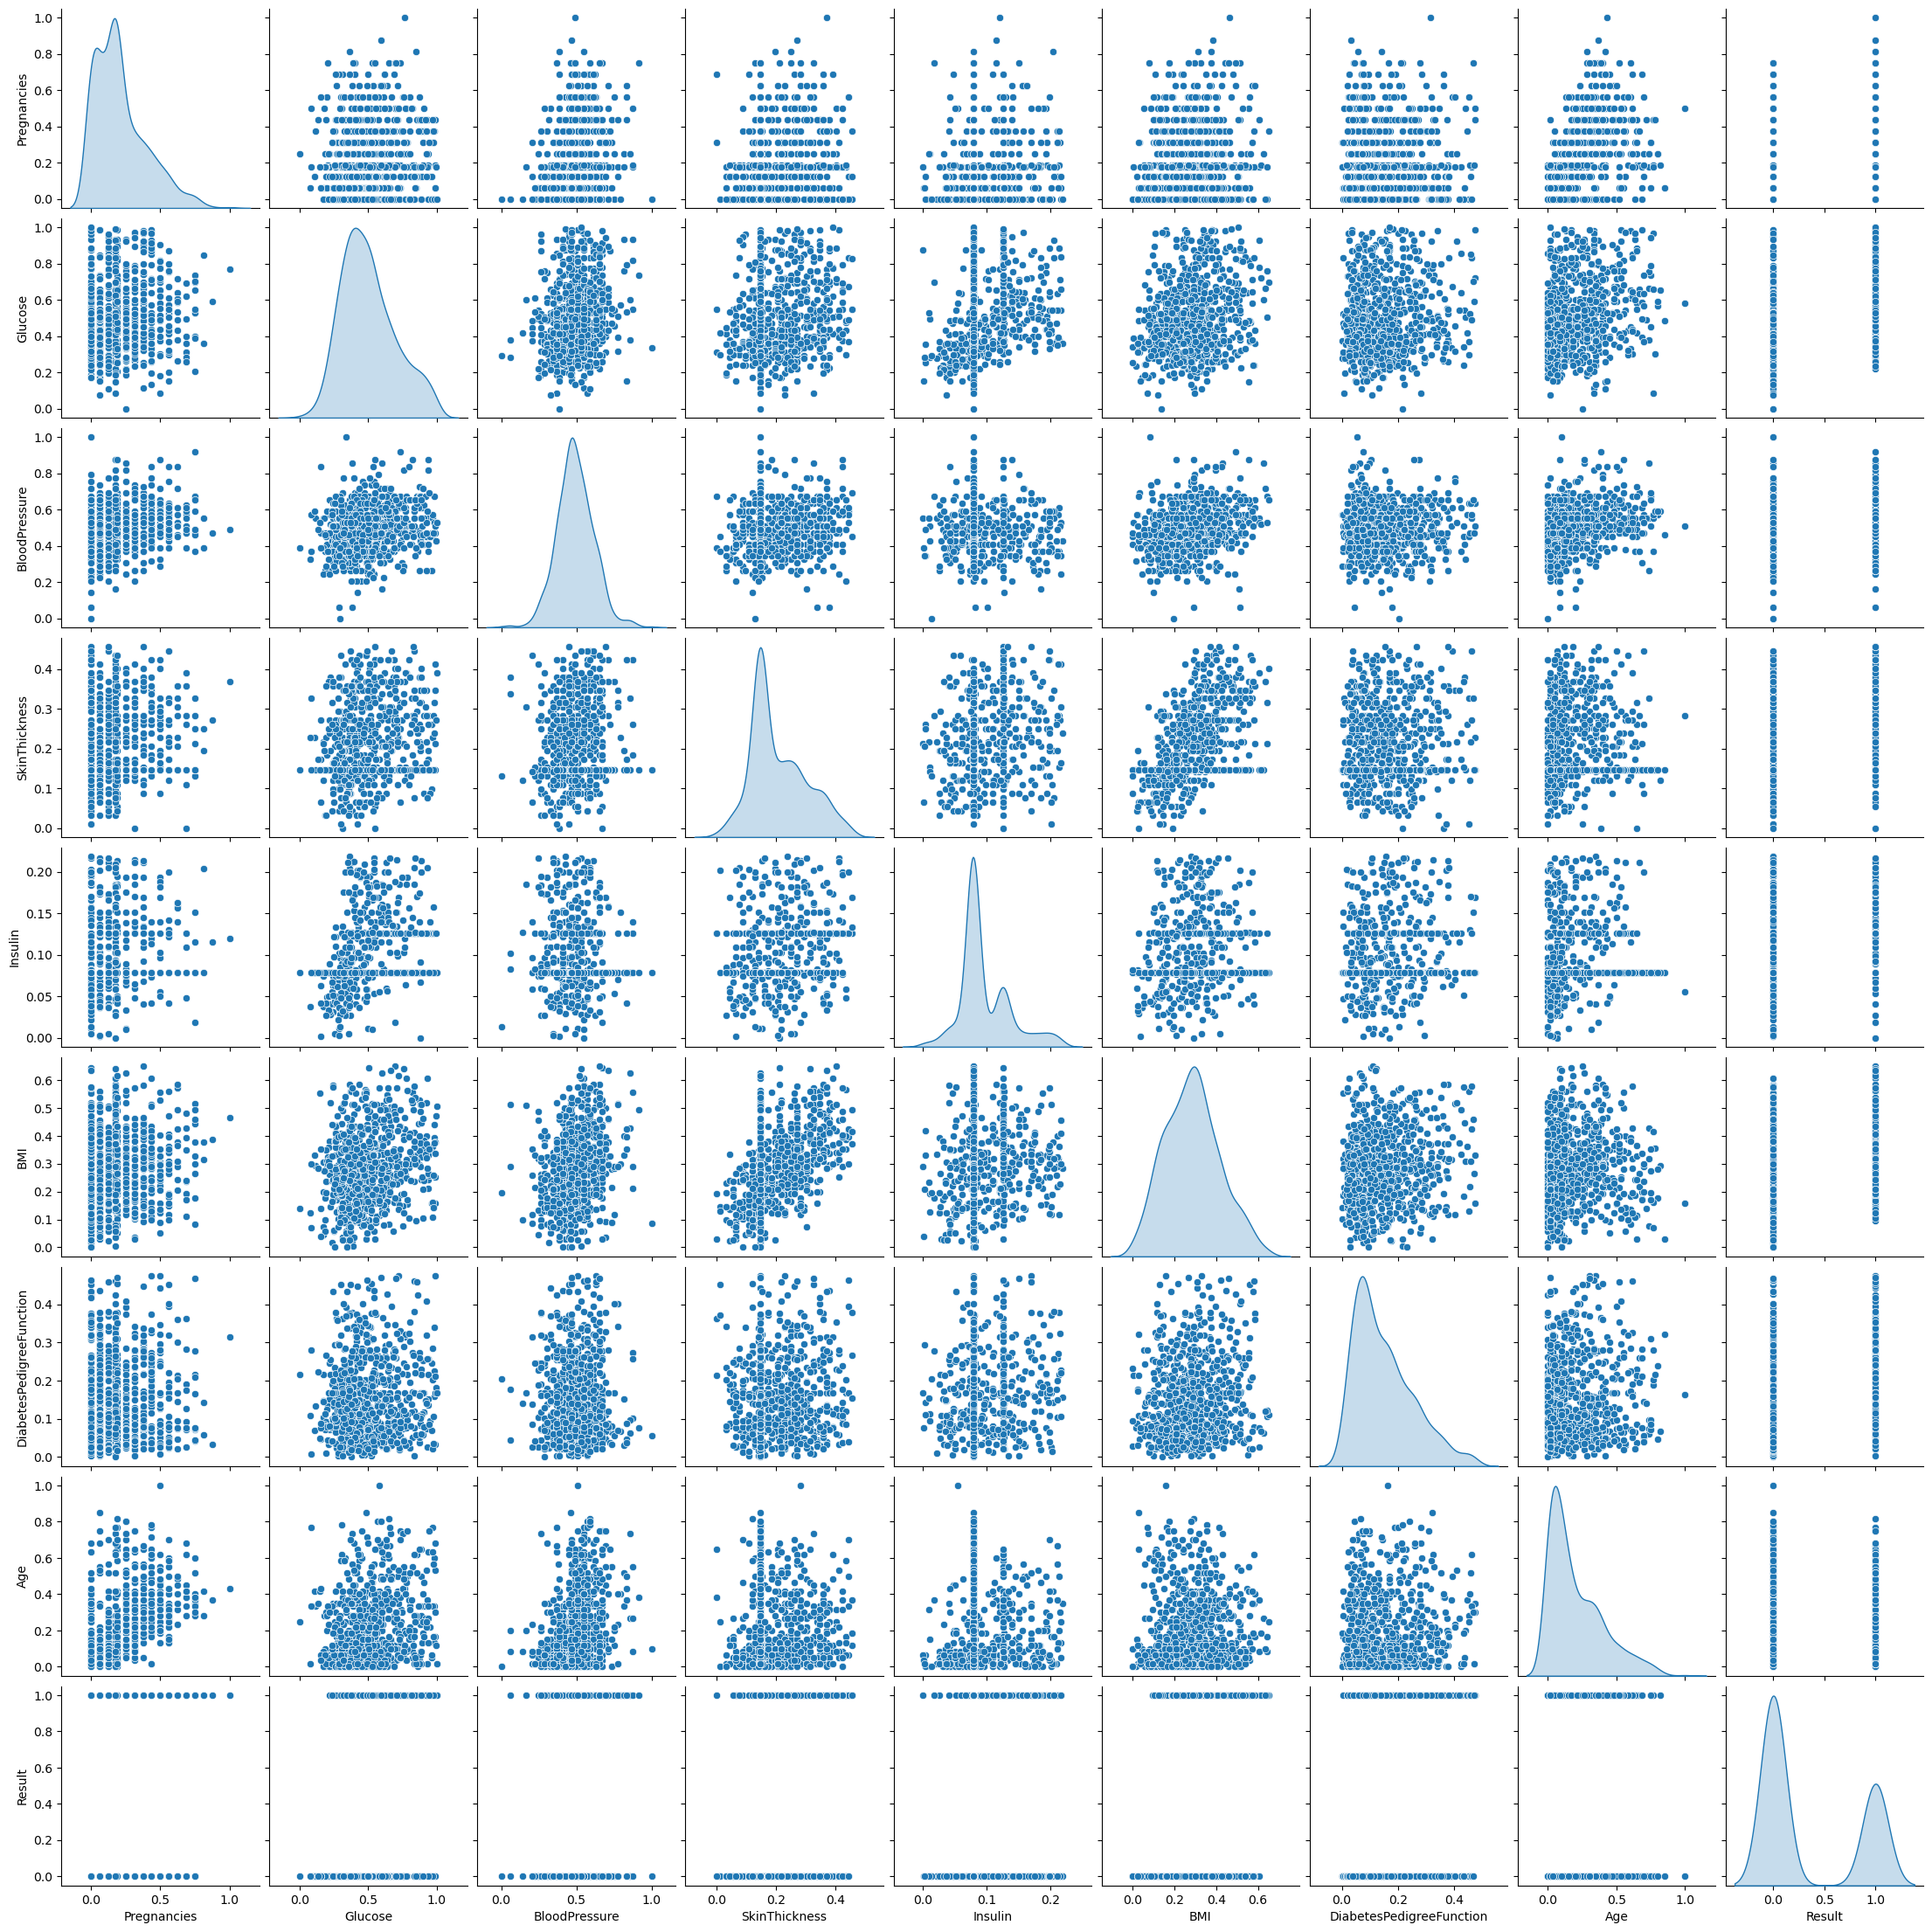

In [403]:
import seaborn as sns

# Tüm özelliklerin dağılım grafiğini çizme
sns.pairplot(normalized_df, diag_kind='kde')
plt.show()


In [433]:
# PCA uygula ve bileşen sayısını normalize edilmiş veri çerçevesindeki öznitelik sayısıyla aynı yap
pca = PCA(n_components=normalized_df.shape[1] - 1)
principal_components = pca.fit_transform(normalized_df.drop(columns=['Result']))

# PCA sonuçlarını DataFrame'e dönüştür ve öznitelik isimlerini atama
pca_df = pd.DataFrame(data=principal_components, columns=normalized_df.drop(columns=['Result']).columns)

# Sonuçları göster
print("PCA Sonuçları:")
print(pca_df.head())


# LDA uygula
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Sınıf sayısını belirle
n_classes = len(df['Result'].unique())

# LDA uygula
lda = LinearDiscriminantAnalysis(n_components=min(n_classes - 1, normalized_df.shape[1] - 1))  # minimum değeri al
lda_df = lda.fit_transform(normalized_df.drop(columns=['Result']), normalized_df['Result'])

lda_df = pd.DataFrame(lda_df)

# Sonuçları göster
print("\nLDA Sonuçları:")
lda_df



PCA Sonuçları:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.323961  0.037527       0.046638      -0.070757 -0.123781 -0.006825   
1    -0.277575 -0.121887       0.074174      -0.130340 -0.016050 -0.037757   
2     0.245083  0.178596       0.197782       0.331190 -0.060920  0.124095   
3    -0.376005 -0.057570       0.035598      -0.023107  0.070868 -0.065571   
4    -0.013992  0.157485      -0.083095       0.049282 -0.313785 -0.217127   

   DiabetesPedigreeFunction       Age  
0                  0.059559 -0.042537  
1                  0.077962 -0.010139  
2                  0.026250 -0.042071  
3                  0.012937  0.016936  
4                 -0.054860  0.058365  

LDA Sonuçları:


,0
0,-1.325387
1,1.818472
2,-1.832063
3,1.849620
4,-1.315285
...,...
763,-0.163171
764,0.096918
765,0.489238
766,0.270059


In [434]:
# En yüksek iki öz değeri al
explained_variance_ratios = pca.explained_variance_ratio_
top_two_components = pca.components_[:2]

print("En yüksek öz değer:")
print(explained_variance_ratios)
print("\nEn yüksek iki bileşen:")
print(top_two_components)

En yüksek öz değer:
[0.39331949 0.2105774  0.12444225 0.09984886 0.07186012 0.06015758
 0.03204068 0.00775363]

En yüksek iki bileşen:
[[ 0.55028151  0.45169725  0.2289491   0.06249266  0.02359075  0.13324528
   0.03625361  0.64591925]
 [-0.41793206  0.80413252  0.04252077  0.1309016   0.06701236  0.25373427
   0.07166902 -0.29283486]]


In [407]:
# Öznitelik katsayılarını al
feature_importances = abs(lda.coef_)

# Sütun isimlerini katsayılarla eşleştir
feature_importances_df = pd.DataFrame(data=feature_importances, columns=normalized_df.drop(columns=['Result']).columns)

# En önemli öznitelikleri belirle
most_discriminative_features = feature_importances_df.max().sort_values(ascending=False)

print("En ayırt edici öznitelikler:")
print(most_discriminative_features)


En ayırt edici öznitelikler:
Glucose                     6.413832
BMI                         4.204020
DiabetesPedigreeFunction    2.773503
Pregnancies                 2.432499
Insulin                     0.941479
BloodPressure               0.744856
Age                         0.733090
SkinThickness               0.230307
dtype: float64


In [408]:
# Ana veri setine dönüşümleri ekle
df['PCA_Component1'] = pca_df['Glucose']
df['PCA_Component2'] = pca_df['BMI']
df['PCA_Component3'] = pca_df['Pregnancies']
df['PCA_Component4'] = pca_df['DiabetesPedigreeFunction']
df['PCA_Component5'] = pca_df['BloodPressure']
df[lda_df.columns] = lda_df

# Dönüşüm öznitelik matrisine dönüşümleri ekle
transformed_features_df = pd.concat([pca_df, lda_df], axis=1)


transformed_features_df = pd.DataFrame(transformed_features_df)
print("\nDönüşüm öznitelik matrisi:")
transformed_features_df



Dönüşüm öznitelik matrisi:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,0
0,0.323961,0.037527,0.046638,-0.070757,-0.123781,-0.006825,0.059559,-0.042537,-1.325387
1,-0.277575,-0.121887,0.074174,-0.130340,-0.016050,-0.037757,0.077962,-0.010139,1.818472
2,0.245083,0.178596,0.197782,0.331190,-0.060920,0.124095,0.026250,-0.042071,-1.832063
3,-0.376005,-0.057570,0.035598,-0.023107,0.070868,-0.065571,0.012937,0.016936,1.849620
4,-0.013992,0.157485,-0.083095,0.049282,-0.313785,-0.217127,-0.054860,0.058365,-1.315285
...,...,...,...,...,...,...,...,...,...
763,0.476565,-0.363521,-0.076327,-0.111222,-0.067803,-0.188723,0.203572,0.090868,-0.163171
764,-0.142810,0.114948,-0.050285,-0.052481,0.009686,-0.060945,-0.040078,-0.018204,0.096918
765,-0.037736,-0.043383,0.077416,0.096914,0.079764,-0.011739,0.036944,0.028022,0.489238
766,0.003891,0.016184,0.236694,-0.194600,-0.102542,-0.118849,-0.046440,-0.017454,0.270059


In [409]:
# Sonuçları göster
print("Ana veri seti:")
df.head()

Ana veri seti:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result,PCA_Component1,PCA_Component2,PCA_Component3,PCA_Component4,PCA_Component5,0
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0.037527,-0.006825,0.323961,0.059559,0.046638,-1.325387
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,-0.121887,-0.037757,-0.277575,0.077962,0.074174,1.818472
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0.178596,0.124095,0.245083,0.026250,0.197782,-1.832063
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,-0.057570,-0.065571,-0.376005,0.012937,0.035598,1.849620
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,0.157485,-0.217127,-0.013992,-0.054860,-0.083095,-1.315285


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


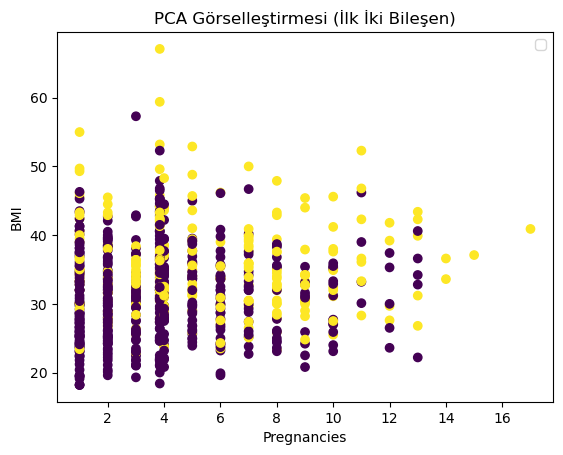

In [410]:
import matplotlib.pyplot as plt

pca1 = df['Pregnancies']
pca2 = df['BMI']

# Her bir sınıf için farklı renkler kullanarak bir saçılım grafiği oluştur
plt.scatter(pca1, pca2, c=df['Result'], cmap='viridis')  

# Etiketler ve başlık ekleyin
plt.xlabel('Pregnancies')
plt.ylabel('BMI')
plt.title('PCA Görselleştirmesi (İlk İki Bileşen)')

# Sınıflar için renk kullanılıyorsa legend ekleyin
if 'Result' in df.columns:
    plt.legend()

# Grafiği gösterin
plt.show()


In [411]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result,PCA_Component1,PCA_Component2,PCA_Component3,PCA_Component4,PCA_Component5,0
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0.037527,-0.006825,0.323961,0.059559,0.046638,-1.325387
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,-0.121887,-0.037757,-0.277575,0.077962,0.074174,1.818472
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0.178596,0.124095,0.245083,0.026250,0.197782,-1.832063
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,-0.057570,-0.065571,-0.376005,0.012937,0.035598,1.849620
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,0.157485,-0.217127,-0.013992,-0.054860,-0.083095,-1.315285


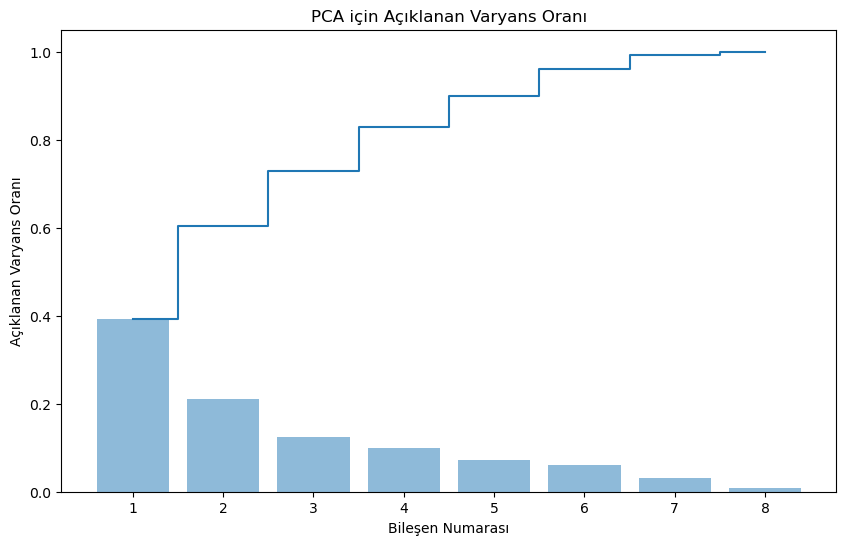

In [412]:
# PCA'nın açıkladığı varyansı görselleştir
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance_ratios) + 1), np.cumsum(explained_variance_ratios), where='mid')
plt.xlabel('Bileşen Numarası')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA için Açıklanan Varyans Oranı')
plt.show()


In [413]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler ve bağımlı değişkeni ayır
X = normalized_df.drop(columns=['Result'])
y = normalized_df['Result']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Çoklu Doğrusal Regresyon modelini oluştur
linear_reg_model = LinearRegression()

# Modeli eğit
linear_reg_model.fit(X_train, y_train)

# Tahmin yap
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Performans metriklerini hesapla
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)

# Performans metriklerini yazdır
print("Çoklu Doğrusal Regresyon Performansı:")
print("R^2 Score:", r2_linear_reg)
print("Mean Squared Error:", mse_linear_reg)
print("Mean Absolute Error:", mae_linear_reg)


Çoklu Doğrusal Regresyon Performansı:
R^2 Score: 0.24229149742791867
Mean Squared Error: 0.17153199361089072
Mean Absolute Error: 0.3407242617105469


In [415]:
from sklearn.linear_model import LogisticRegression

# Multinominal Lojistik Regresyon modelini oluştur
logistic_reg_model = LogisticRegression(max_iter=10000)

# Modeli eğit
logistic_reg_model.fit(X_train, y_train)

# Tahmin yap
y_pred_logistic_reg = logistic_reg_model.predict(X_test)

# Performans metriklerini hesapla
accuracy_logistic_reg = logistic_reg_model.score(X_test, y_test)

# Performans metriklerini yazdır
print("\nMultinominal Lojistik Regresyon Performansı:")
print("Accuracy Score:", accuracy_logistic_reg)



Multinominal Lojistik Regresyon Performansı:
Accuracy Score: 0.7532467532467533


In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Bağımsız değişkenler (X) ve hedef değişken (y) belirleme
X_train = df.drop(columns=['Result'])
y_train = df['Result']

# Sütun isimlerini metinsel türe dönüştürme
X_train.columns = X_train.columns.astype(str)

# Çoklu Doğrusal Regresyon modelini eğitme
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


# Model performansını değerlendirme
y_pred = linear_reg.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print("Çoklu Doğrusal Regresyon Performansı:")
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Çoklu Doğrusal Regresyon Performansı:
R^2 Score: 0.32726035944480936
Mean Squared Error: 0.15283730711940435
Mean Absolute Error: 0.3226291593160489


In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# Multinominal Lojistik Regresyon modelini eğitme
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Model performansını değerlendirme
y_pred = log_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')


print("Multinominal Lojistik Regresyon Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("Hassasiyet (Precision):", precision)
print("Özgüllük (Recall):", recall)
print("F1 Skoru:", f1)
    

Multinominal Lojistik Regresyon Performansı:
Doğruluk (Accuracy): 0.78125
Hassasiyet (Precision): 0.7766097877796149
Özgüllük (Recall): 0.78125
F1 Skoru: 0.774600022046029


C:\Users\Görkem\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


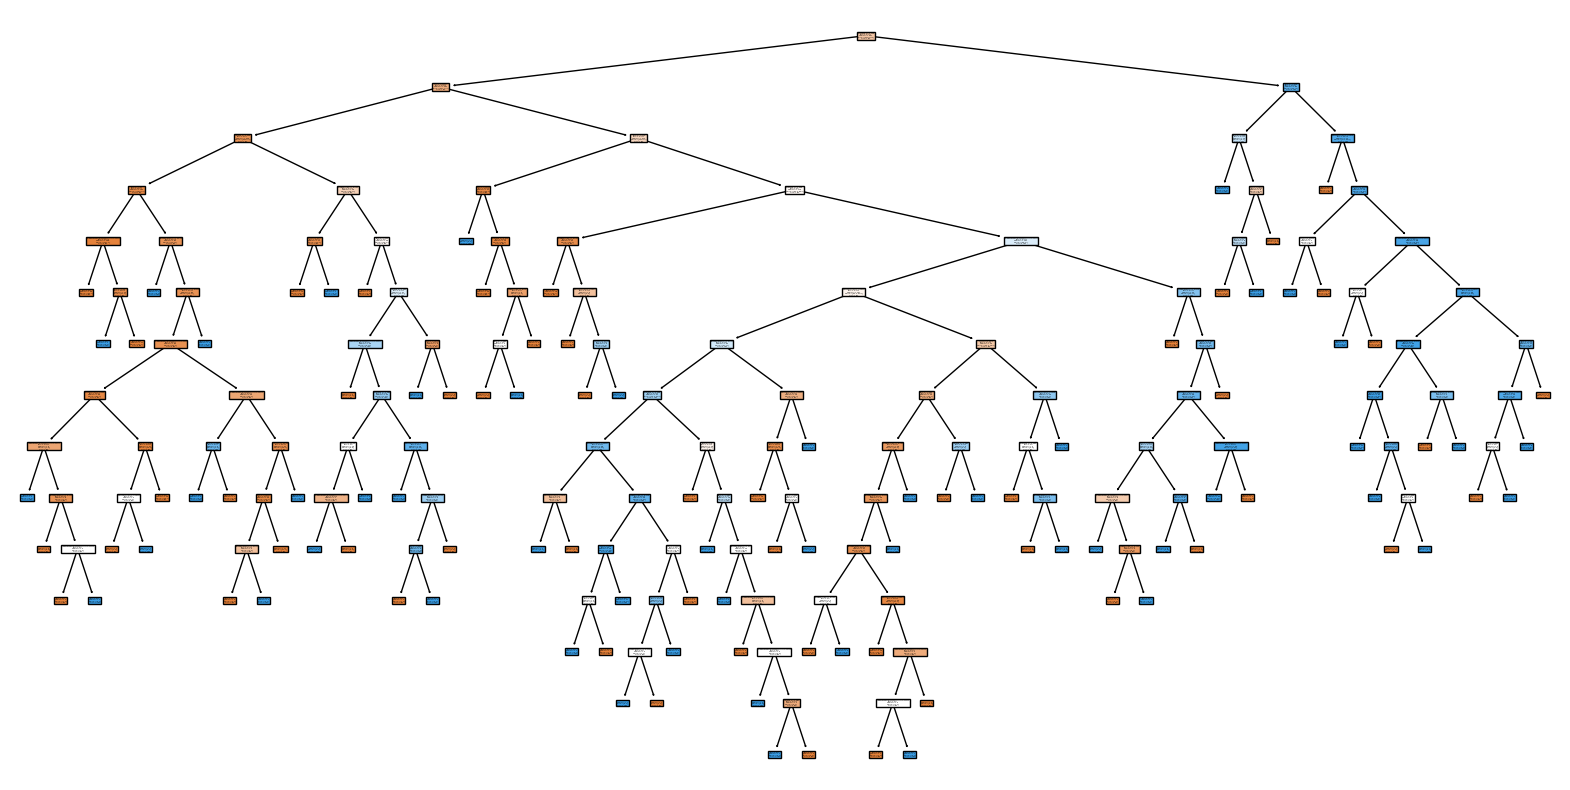

Karar Ağacı Sınıflandırma Performansı:
Doğruluk Skoru: 0.6796536796536796
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       151
           1       0.54      0.55      0.54        80

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [418]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Veriyi öznitelikler ve hedef değişken olarak ayırma
X = normalized_df.drop(columns=['Result'])
y = normalized_df['Result']

# Veriyi %70 eğitim ve %30 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı sınıflandırma modeli oluşturma
decision_tree = DecisionTreeClassifier(random_state=42)

# Modeli eğitim verilerine uygulama
decision_tree.fit(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendirme
y_pred = decision_tree.predict(X_test)

# Doğruluk skorunu hesaplama
accuracy = accuracy_score(y_test, y_pred)

# Sınıflandırma raporunu oluşturma
classification_rep = classification_report(y_test, y_pred)

# Karar ağacı yapısını görselleştirme
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# Sonuçları yazdırma
print("Karar Ağacı Sınıflandırma Performansı:")
print(f"Doğruluk Skoru: {accuracy}")
print("Sınıflandırma Raporu:")
print(classification_rep)


Budanmış Karar Ağacı Performansı:
Accuracy: 0.7532467532467533


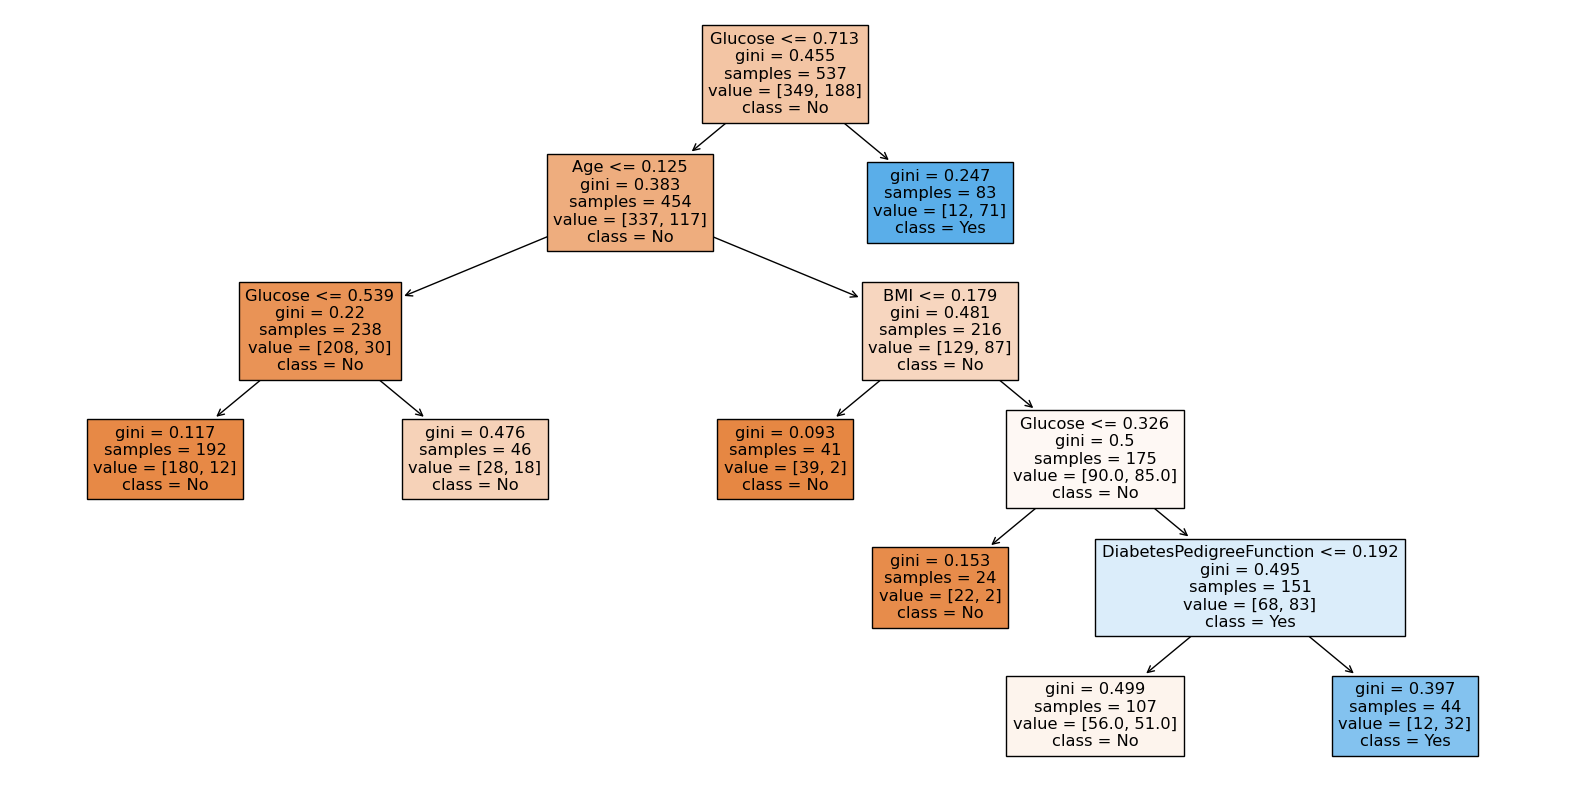

In [419]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Karmaşıklık maliyeti yolunu hesaplayın
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Farklı ccp_alpha değerleri için karar ağaçlarını oluşturun
pruned_trees = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

# En iyi performansı sağlayan ağacı seçin
best_tree = max(pruned_trees, key=lambda x: x.score(X_test, y_test))

# Budanmış ağacın performansını değerlendirin
y_pred_test_pruned = best_tree.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_test_pruned)

print("Budanmış Karar Ağacı Performansı:")
print(f"Accuracy: {accuracy_pruned}")

# Karar ağacını çizme
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


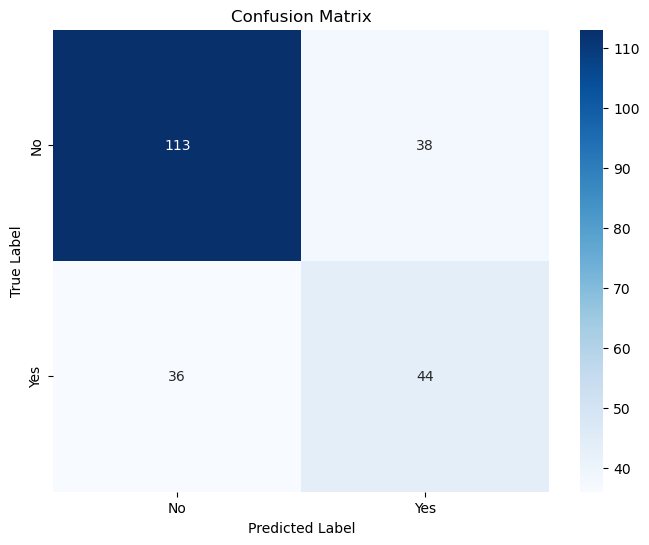

In [432]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test seti üzerinde modelin tahminlerini alın
y_pred = decision_tree.predict(X_test)

# Karmaşıklık matrisini oluşturun
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [420]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Veri setini rastgele olarak %70 eğitim ve %30 test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Eğitim veri seti üzerinde tahminler yapma
y_train_pred = naive_bayes_model.predict(X_train)

# Test veri seti üzerinde tahminler yapma
y_test_pred = naive_bayes_model.predict(X_test)

# Eğitim ve test veri setleri için performans metriklerini hesaplama
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Sonuçları raporlama
print("Eğitim Veri Seti Performansı:")
print(f"Doğruluk Skoru: {train_accuracy}")
print("Sınıflandırma Raporu:")
print(train_classification_report)

print("\nTest Veri Seti Performansı:")
print(f"Doğruluk Skoru: {test_accuracy}")
print("Sınıflandırma Raporu:")
print(test_classification_report)


Eğitim Veri Seti Performansı:
Doğruluk Skoru: 0.7690875232774674
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       349
           1       0.68      0.65      0.66       188

    accuracy                           0.77       537
   macro avg       0.75      0.74      0.74       537
weighted avg       0.77      0.77      0.77       537


Test Veri Seti Performansı:
Doğruluk Skoru: 0.7229437229437229
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



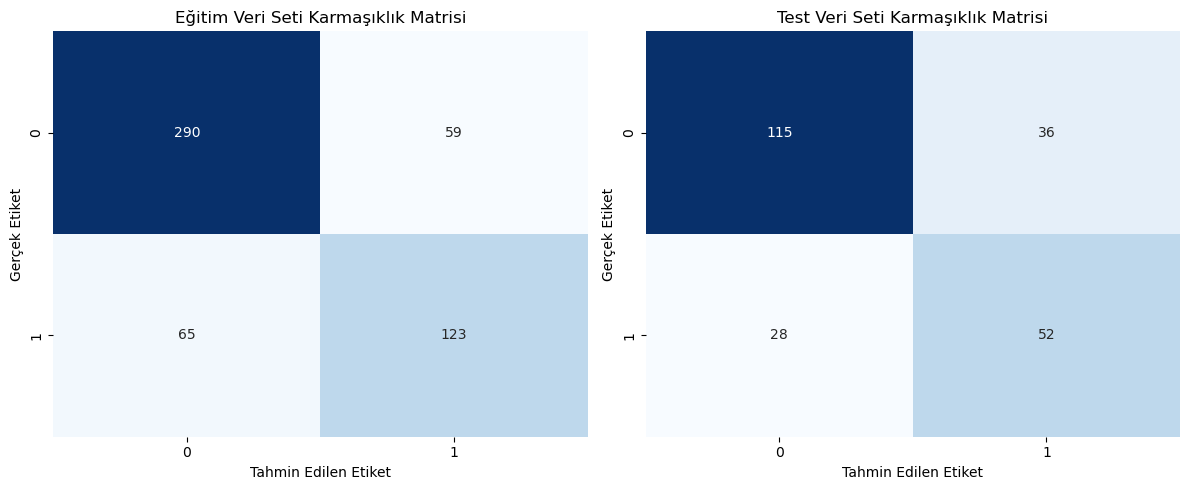

Eğitim Veri Seti Performansı:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       349
           1       0.68      0.65      0.66       188

    accuracy                           0.77       537
   macro avg       0.75      0.74      0.74       537
weighted avg       0.77      0.77      0.77       537


Test Veri Seti Performansı:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



In [421]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Eğitim ve test veri setleri üzerinde tahmin edilen değerler
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Karmaşıklık matrislerini hesaplayalım
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Karmaşıklık matrislerini görselleştirelim
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Eğitim Veri Seti Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Test Veri Seti Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')

plt.tight_layout()
plt.show()


# Eğitim ve test veri setleri üzerinde tahmin edilen değerler
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Eğitim ve test veri setleri için performans metriklerini hesapla
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Sonuçları yazdır
print("Eğitim Veri Seti Performansı:")
print(train_report)

print("\nTest Veri Seti Performansı:")
print(test_report)



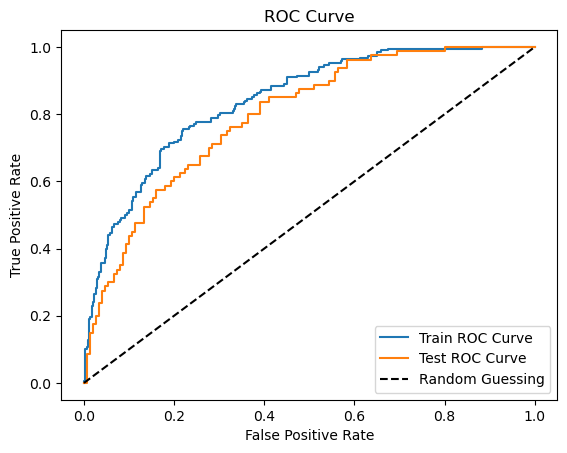

Eğitim Veri Seti ROC AUC Skoru: 0.8397396817655308
Test Veri Seti ROC AUC Skoru: 0.7948675496688741


In [423]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Eğitim veri seti üzerinde tahminler yapma
y_train_pred_prob = naive_bayes_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)

# Test veri seti üzerinde tahminler yapma
y_test_pred_prob = naive_bayes_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)

# ROC eğrisini çizme
plt.plot(fpr_train, tpr_train, label='Train ROC Curve')
plt.plot(fpr_test, tpr_test, label='Test ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Eğitim veri seti için ROC AUC skorunu hesaplama
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Test veri seti için ROC AUC skorunu hesaplama
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

print("Eğitim Veri Seti ROC AUC Skoru:", roc_auc_train)
print("Test Veri Seti ROC AUC Skoru:", roc_auc_test)


In [426]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes sınıflandırıcısını oluşturma
naive_bayes_model = GaussianNB()

# Modeli eğitim verilerine uygulama
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

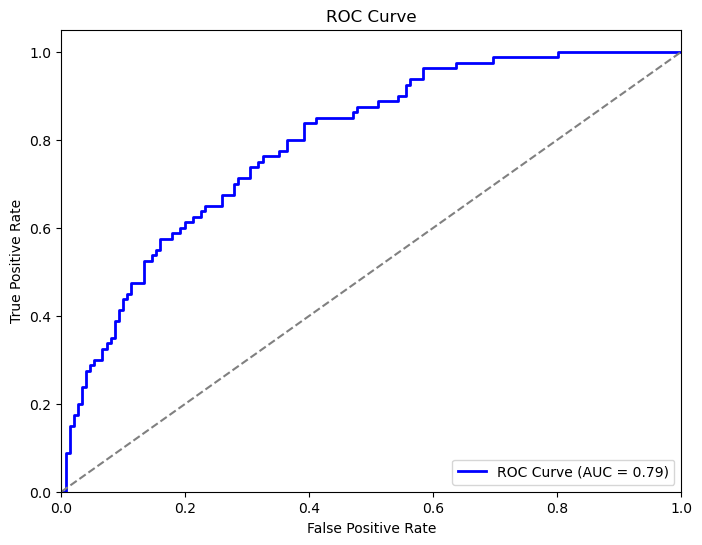

In [431]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Naive Bayes sınıflandırıcısını oluşturun ve eğitin
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin olasılıklarını alın
y_proba = naive_bayes_model.predict_proba(X_test)[:, 1]

# ROC eğrisi ve alanını hesaplayın
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# ROC eğrisini çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
